In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mat4py as mt
import os

In [19]:
%cd A:\python\EEG\Data\Disorder

A:\python\EEG\Data\Disorder


In [106]:
N_channel = 19
N_subj = 132

In [93]:
disorder_dic = []
directory = os.fsencode('Data\Disorder')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    disorder_dic.append(np.array(mt.loadmat('Data\Disorder\{}'.format(filename))[filename.split('.')[0]]))
    
channels_disorder = [ [] for i in range(len(disorder_dic))]  #channels[person][channel] it will be a numpy array
j=0;
for person in channels_disorder:
    for i in range(19):
        person.append(disorder_dic[j][:,i])

        
normal_dic = []
directory = os.fsencode('Data\\Normal')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    normal_dic.append(np.array(mt.loadmat('Data\\Normal\{}'.format(filename))[filename.split('.')[0]]))
    
channels_normal = [ [] for i in range(len(normal_dic))]  #channels[person][channel] it will be a numpy array
j=0;
for person in channels_normal:
    for i in range(19):
        person.append(normal_dic[j][:,i])
        
        
data = {"N":channels_normal,
      "D":channels_disorder}

Now the syntax of our data is like the following:

Data[Type][person][channel]

Type --->   "N" for Normal
            "

(-4, 256.0)

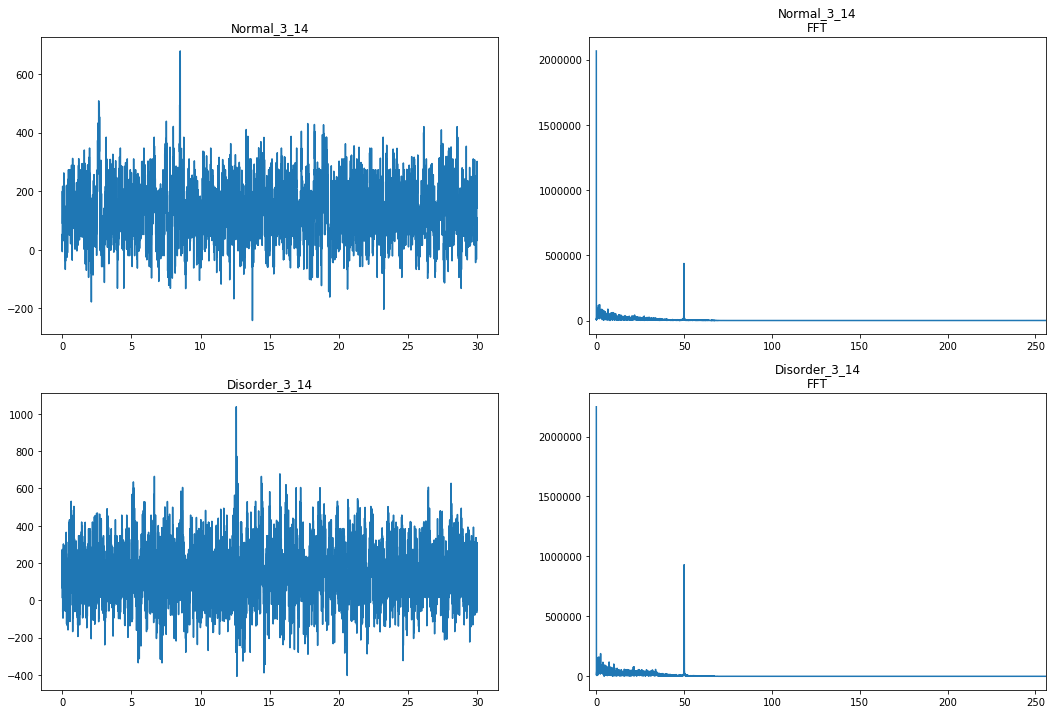

In [99]:
t = np.linspace(0,30,512*30)
f = np.linspace(0,512,512*30)
fig = plt.figure( 'Example Plot', figsize=(18,12))
ax = fig.add_subplot(2,2,1, title = 'Normal_3_14')
ax.plot(t,data["N"][3][14])
ax = fig.add_subplot(2,2,2, title = 'Normal_3_14\nFFT')
ax.plot(f,abs(np.fft.fft(data["N"][3][14])))
ax.set_xlim([-4,512/2])
ax = fig.add_subplot(2,2,3, title = 'Disorder_3_14')
ax.plot(t,data["D"][3][14])
ax = fig.add_subplot(2,2,4, title = 'Disorder_3_14\nFFT')
ax.plot(f,abs(np.fft.fft(data['D'][3][14])))
ax.set_xlim([-4,512/2])


As we can see in the above plots, the both disorder and normal cases has a pick on 50 hz.
But the intensity of the pick of the disorder subject is higher.

# Averaging

The different persons with same channels can attribute to a better nois cancelation by averaging

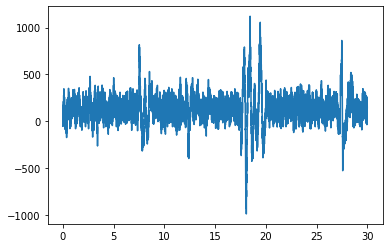

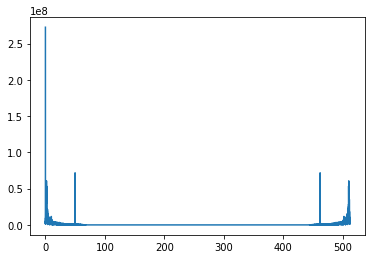

In [116]:
chan = 12
chann_avg = np.zeros(512*30)
for i in range (N_subj):
    chann_avg += data['N'][i][chan]
chann_av = chann_avg/N_subj
plt.plot(t,chann_av)  
plt.figure()
plt.plot(f,np.abs(np.fft.fft(chann_avg))) 

In [105]:
a.shape

(15360,)

In [104]:
data['N'][3][3].shape

(15360,)